# Простые задачи
## Ряд Фибоначчи
Любое число, кроме первых двух, является суммой двух предыдущих  
$0, 1, 1, 2, 3, 5, 8, 13, 21, ...$

In [2]:
# рекурсивный подход
def fib_recursive(n):
    if n < 2:
        return n
    else:
        return fib_recursive(n-1) + fib_recursive(n-2)
    
print(f'Восьмое число в ряду Фибоначчи: {fib_recursive(8)}')

Восьмое число в ряду Фибоначчи: 21


**Особенность рекурсии** в том, что ей требуется базовый случай для того, чтобы избежать бесконечной рекурсии. Наличие базового случая - обязанность программиста.  

**Проблема рекурсии** в том, что дерево вызовов функции растет в геометрической прогрессии

In [4]:
# мемоизация
memo = {0:0, 1:1}
def fib_memo(n):
    if n not in memo:
        memo[n] = fib_memo(n-1) + fib_memo(n-2)
    return memo[n]

print(f'50-ое число в ряду Фибоначчи: {fib_memo(50)}')

50-ое число в ряду Фибоначчи: 12586269025


**Мемоизация** - метод, при котором сохраняются результаты выполненных вычислений. Когда они понадобятся, их можно найти.

*Python поддерживает автоматическую мемоизацию с помощью декоратора lru_cache*

In [5]:
# итеративный метод
def fib_iteration(n):
    if n == 0:
        return 0
    last, next = 0, 1
    for i in range(1, n):
        last, next = next, last + next
    return next

print(f'80-ое число в ряду Фибоначчи: {fib_iteration(80)}')

80-ое число в ряду Фибоначчи: 23416728348467685


Самая эффективная версия - итеративная. В этом случае тело цикла выполнится всего $n-1$ раз. В рекурсивном подходе мы *приступаем к задаче с конца*, а в итеративном - *с начала*.

In [9]:
# генератор чисел Фибоначчи
def fib_generator(n):
    yield 0 
    if n>0: 
        yield 1
    last, next = 0, 1
    for _ in range(1, n):
        last, next = next, last+next
        yield next
        
print('Первая десятка чисел из ряда Фибоначчи: ')
for number in fib_generator(10):
    print(number, end=' ')

Первая десятка чисел из ряда Фибоначчи: 
0 1 1 2 3 5 8 13 21 34 55 

## Простейшее сжатие
Зачастую важна экономия места (виртуального или реального). **Сжатие** - это процесс получения данных и их кодирования (изменения их формы или представления) таким образом, чтобы они занимали меньше места. **Распаковка** - обратный процесс - возвращение данных в первоначальную форму. Чтобы сжать часть данных и распаковать, требуется время. Поэтому сжатие используется не для всех данных: иногда время выполнения важнее, чем используемая память.

**Когда чаще всего требуется сжать данные?**
Обычно сжатие используется тогда, когда хранилище данных использует намного больше битов, чем необходимо для содержимого. *Пример: для хранения нуклеотидов (A, C, G, T) требуется всего 2 бита (2^2 = 4 различных значения: 00, 01, 10, 11). Однако на практике, если хранить нуклеотид как символ строки, то для его хранения потребуется 8 бит. Решение - использовать **строку битов**
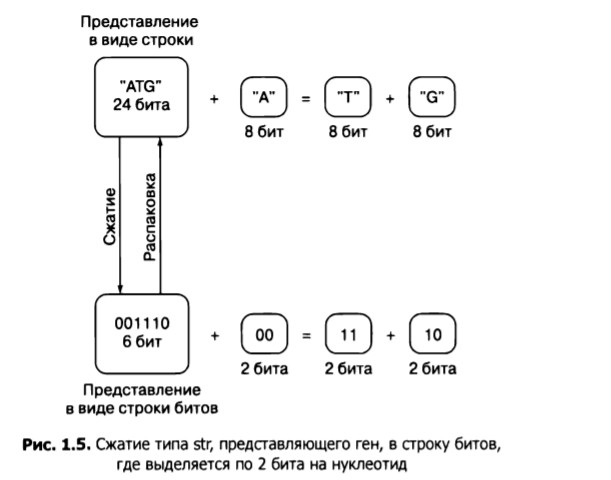

In [14]:
# Преобразование строки нуклеотидов в строку битов
class CompressedGene:
    def __init__(self, gene):
        self._compress(gene)
    
    def _compress(self, str_gene): ## подчеркивание означает, что метод "приватный"  (соглашение, но не официальное)
        self.bit_string = 1  ## начальная метка
        
        for nucleotide in str_gene.upper():
            self.bit_string <<= 2 ## сдвиг влево на 2 бита
            
            if nucleotide == 'A':     # поменять последние два бита на 00
                self.bit_string |= 0b00
            elif nucleotide == 'C':   # поменять последние два бита на 01  
                self.bit_string |= 0b01
            elif nucleotide == 'G':   # поменять последние два бита на 10  
                self.bit_string |= 0b10
            elif nucleotide == 'T':   # поменять последние два бита на 11  
                self.bit_string |= 0b11
            else:
                raise ValueError(f'Невалидный нуклеотид: {nucleotide}')
    
    def decompress(self):
        gene = ""
        for i in range(0, self.bit_string.bit_length()-1, 2):
            bits = self.bit_string >> i & 0b11
            if bits == 0b00:
                gene += 'A'
            elif bits == 0b01:
                gene += 'C'
            elif bits == 0b10:
                gene += 'G'
            elif bits == 0b11:
                gene += 'T'
            else:
                raise ValueError(f'Невалидная пара бит: {bits}')
        return gene[::-1] # обращение строки посредством обратных срезов
    
    
    def __str__(self):
        return self.decompress

Метод *compress* последовательно просматривает каждый символ с троке нуклеотидов. Встретив определенный символ, он добавляет в строку битов определнное окончание. Перед добавление очередного нуклеотида строка сдвигается на бита влево (чтобы освободить место под новый нуклеотид). После такого сдвига слева остается два нуля, которые заменяются на определенное окончание (с помощью операции ИЛИ)

Метод *decompress* выполняет обратную операцию: из сжатой строки "вытаскивает" первоначальную. Она последовательно считывает по 2 бита и использует их для определения нуклеотида в первоначальной последовательности.

In [20]:
from sys import getsizeof

gen = 'TAAAAAAAAAAAAATATAGTGAGTGCGTGCGCCCCCCCTACTCATCTAGCAGACAGCATCGAGCATCAG'
print(f'Оригинальный размер нуклеотидной последовательности: {getsizeof(gen)}')

compressed_gen = CompressedGene(gen)
print(f'Размер сжатой нуклеотидной последовательности: {getsizeof(compressed_gen)}')
print(f'Распаковка: {compressed_gen.decompress()}')
print(f'Проверка: {compressed_gen.decompress() == gen}')

Оригинальный размер нуклеотидной последовательности: 118
Размер сжатой нуклеотидной последовательности: 48
Распаковка: TAAAAAAAAAAAAATATAGTGAGTGCGTGCGCCCCCCCTACTCATCTAGCAGACAGCATCGAGCATCAG
Проверка: True


## Невскрываемое шифрование
**Одноразовый шифр** - это шифрование данных путем комбинации их с случайными фиктивными данными таким образом, что оригинал не может быть восстановлен без доступа как к результату шифрования, так и к фиктивным данным. Сами по себе фиктивные данные, ровно как и отдельно взятый результат шифрования, бесполезны. Имеет значение только их комбинация.

In [2]:
from secrets import token_bytes

def random_key(n):
    tb = token_bytes(n) ## генерация n случайных байтов
    return int.from_bytes(tb, "big") ## тип int может иметь произвольный размер => задействуем его как битовую строку

Для объединения фиктивных данных и исходными будем использовать операцию **XOR**. Её важное свойство заключается в следующем:   
A XOR B = C  
C XOR B = A  
C XOR A = B

Чтобы сформировать результат, мы с помощью XOR объединяем байты исходной строки string и случайно сгенерированную значения int той же длины.

In [4]:
def encrypt(string):
    original_bytes = string.encode()
    original_key = int.from_bytes(original_bytes, "big")
    ## big означает порядок следования байтов (какой байт первый - старший или младший?)
    
    fictive = random_key(len(original_bytes))
    
    encrypted = fictive ^ original_key # XOR
    
    return encrypted, fictive

def decrypt(key_fictive, key_result):
    decrypted = key_fictive ^ key_result # в байтах
    
    result_decrypted = decrypted.to_bytes((decrypted.bit_length()+7) // 8, "big")
    ## длину расшифрованной строки в битах делим на 8, чтобы получить число байт (гарантируем округление благодаря +7)
    return result_decrypted.decode()

key1, key2 = encrypt("Hello World!")
print(f'Фиктивные данные: {key2} \n Результат шифрования: {key1}')
print(f'Проверка дешифратора: {decrypt(key2, key1)}')

Фиктивные данные: 3206928306791656896610023193 
 Результат шифрования: 20495944610674135752368575288
Проверка дешифратора: Hello World!


## Вычисление числа $\pi$
Число $\pi$ может быть вычислено с помощью **формулы Лейбница**. Согласно ей, бесконечный ряд:  
$4/1 - 4/3 + 4/5 - 4/7 + 4/9 - ... $  
сходится к числу $\pi$

In [5]:
 def calculate_pi(n_iterations):
        numerator = 4
        denominator = 1
        sign = 1
        pi = 0
        for i in range(n_iterations):
            pi += sign*(numerator/denominator)
            sign *= -1
            denominator += 2
        return pi

print(f'Число pi как сумма 30 членов ряда Лейбница: {calculate_pi(30)}')

Число pi как сумма 30 членов ряда Лейбница: 3.108268566698947


Быстрое преобразование между формулой и кодом может быть простым и эффективным при моделировании. В данном случае *часть формулы* была переведена в переменные функции.

## Задача о ханойских башнях
Есть три высоких башни A, B и C. На башню A нанизаны диски с отверстиями. Самый широкий диск - диск 1 - находится внизу. Остальные (над ним) обозначены возрастающими цифрами и постепенно сужаются кверху. Таким образом, самый широкий диск - диск 1, а самый узкий - диск m, где m - суммарное число дисков на башне.  
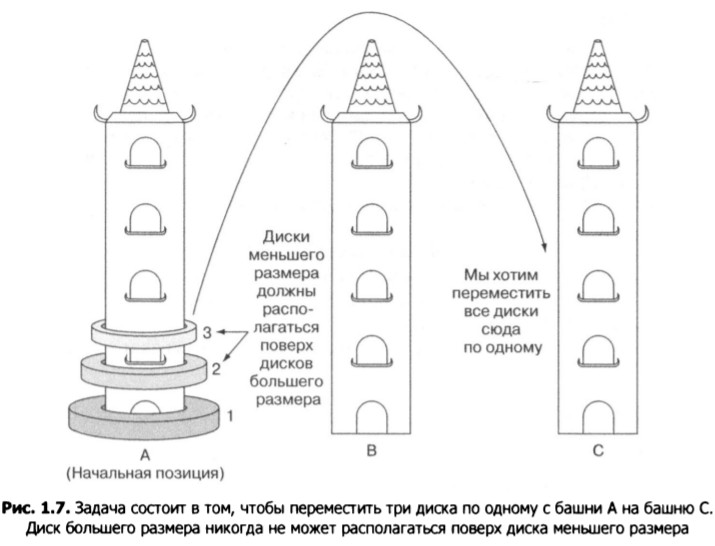
*Цель* : переместить все диски с башни A на башню C, при этом:  
- диски можно перемещать по одному  
- единственный доступный для перемещения диск - тот, что расположен сверху любой из башен
- более широкий диск никогда не может быть выше более узкого

In [12]:
# моделирование башен
class Stack:
    def __init__(self):
        self._container = []
    
    def push(self, elem):
        self._container.append(elem)
        
    def pop(self):
        return self._container.pop()
    
    def __repr__(self):
        # то, что будем выводиться при применении print к stack
        return repr(self._container)
    
tower_A = Stack()
tower_B = Stack()
tower_C = Stack()

num_discs = 3

for i in range(1, num_discs+1):
    tower_A.push(i)
    
print(f'A = {tower_A}, B = {tower_B}, C = {tower_C}')

A = [1, 2, 3], B = [], C = []


**Рекурсивное решение**:  
*Базовым случаем* является перемещение одного диска. В случае, когда дисков много - задействуем рекурсию.  
Пусть есть n дисков. Нам нужно переместить n-1 диск на башню B, тогда мы придем к базовому случаю (башня A содержит 1 диск, его легко переместить на башню C).  
Затем n-1 дисков с башни B нужно переместить на башню C


*Общий алгоритм*:  
- переместить n-1 диск с башни А на башню В, используя С как промежуточную
- переместить оставшийся диск с башни А на башню С
- переместить n-1 диск с башни B на башню A, используя C

In [13]:
def hanoi(tower_from, tower_temp, tower_to, num_discs):
    if num_discs == 1:
        tower_to.push(tower_from.pop())
    else:
        hanoi(tower_from, tower_to, tower_temp, num_discs-1)
        hanoi(tower_from, tower_temp, tower_to, 1)
        hanoi(tower_temp, tower_from, tower_to, num_discs-1)
        
hanoi(tower_A, tower_B, tower_C, num_discs=num_discs)

print('После перемещения:')
print(f'A = {tower_A}, B = {tower_B}, C = {tower_C}')

После перемещения:
A = [], B = [], C = [1, 2, 3]


 Количество вызовов функции hanoi() растет экспоненциально в зависимости от количества дисков

# Резюме
Все, что может быть достигнуто с помощью *рекурсивного метода*, может быть выполнено также итерационным способом.  
*Мемоизация* была успешно использована для ускорения работы синтаксических анализаторов - программ, которые интерпретируют языки.  
*Сжатие* сделало мир, подключенный к Интернету с его ограниченной пропусконой способностью, более терпимым.  
*Одноразовое шифрование* не подходят по современным требованиям к хранению информации, но является простым и показательным примером.  